In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


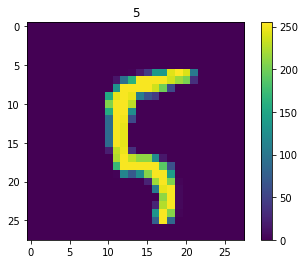

In [24]:
plt.figure()
plt.imshow(train_images[100])
plt.title(train_labels[100])
plt.colorbar()

In [15]:
train_images, test_images = train_images/255.0, test_images/255.0

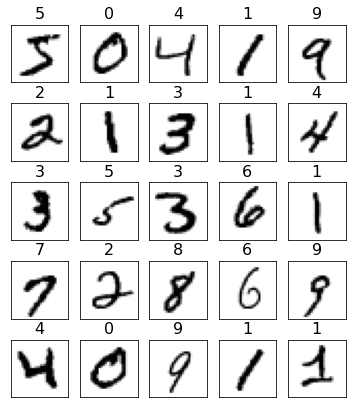

In [17]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(train_labels[i], fontsize=16)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # 히든 레이어
    keras.layers.Dense(10, activation='softmax') # 출력층
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
# network algorithm 선정하기
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 667us/step - loss: 6.7241 - accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 1s 650us/step - loss: 2.1787 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 1s 651us/step - loss: 1.8050 - accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 1s 687us/step - loss: 1.3661 - accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 1s 648us/step - loss: 1.3689 - accuracy: 0.9893


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 8.1749 - accuracy: 0.9723


In [35]:
predictions = model.predict(test_images)
i=151
print(predictions[i])
np.argmax(predictions[i])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


8